In [1]:
#from google.colab import files
#uploaded = files.upload()

Saving pre_data_dl.xlsx to pre_data_dl.xlsx
Saving pre_data_dl_aug1.xlsx to pre_data_dl_aug1.xlsx
Saving pre_data_dl_aug2.xlsx to pre_data_dl_aug2.xlsx


In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding,LSTM,TimeDistributed,Dense,Flatten,Dropout,RepeatVector,GRU,Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [3]:
filename='pre_data_dl.xlsx'
data_dl=pd.read_excel(filename)
pd.set_option('display.max_columns', None)
print(data_dl.head())

filename1='pre_data_dl_aug1.xlsx'
filename2='pre_data_dl_aug2.xlsx'

data_dl_aug1=pd.read_excel(filename1)
pd.set_option('display.max_columns', None)
print(data_dl_aug1.head())

data_dl_aug2=pd.read_excel(filename2)
print(data_dl_aug2.head())


   Unnamed: 0  Unnamed: 0.1  \
0           0             0   
1           1             1   
2           2             2   
3           3             3   
4           4             4   

                        Combined Description Cleaned Assignment group  
0  login issue user manager name checked the name...            GRP_0  
1  outlook received from hello team my are not in...            GRP_0  
2    cannot log in to received from   cannot on best            GRP_0  
3                         unable to access tool page            GRP_0  
4                                              error            GRP_0  
   Unnamed: 0                       Combined Description Cleaned  \
0           0  login issue user manager name checked the name...   
1           1  outlook received from hello team my are not in...   
2           2  cannot log in to received from hi i cannot on ...   
3           3                         unable to access tool page   
4           4                            

In [4]:
X = (data_dl["Combined Description Cleaned"])
y= (data_dl['Assignment group'])

#categorical encoding y
y=pd.get_dummies(data_dl['Assignment group'])
  

In [5]:
#parameters
adam = Adam(lr=0.001)
max_features=10000
emb_dim=300
batch_size=128
epochs=25

In [6]:
#function for tokenizer
def dfTokenizer(df):
 tokenizer=Tokenizer(num_words=max_features,char_level=False)
 tokenizer.fit_on_texts(df)
 sequences=tokenizer.texts_to_sequences(df)
 return sequences,tokenizer
#tokenization
X,tokenizer = dfTokenizer(data_dl["Combined Description Cleaned"]) 
vocab_size=len(tokenizer.word_index)
print("vocabulary size is: ",vocab_size)

vocabulary size is:  3316


In [7]:
#function for padding
def pad(x, length=None):
 if length is None:
   length=max([len(sentence)  for sentence in x])
 return pad_sequences(x,maxlen=length,padding='post')
 
 #padding 
X=pad_sequences(X,padding='post')

In [8]:
#function for splitting the data
def split(X,y):
 X_train_spl,X_test_spl,y_train_spl,y_test_spl=train_test_split(X,y,test_size=0.3,random_state=123)
 return X_train_spl,X_test_spl,y_train_spl,y_test_spl
#split the data
X_train,X_test,y_train,y_test=split(X,y)


In [9]:
#configuring the callback
early_stopping =  EarlyStopping(
    monitor='val_accuracy', 
    patience=3, 
    min_delta=0.001, 
    mode='max'
)

In [10]:
#function for plotting accuracy,loss
def plot(model,history):
 acc = history.history['accuracy']
 val_acc = history.history['val_accuracy']
 loss = history.history['loss']
 val_loss = history.history['val_loss']
 epochs = range(1, len(acc) + 1)
 plt.plot(epochs, acc, 'bo', label='Training acc')
 plt.plot(epochs, val_acc, 'b', label='Validation acc')
 plt.title(modelname + ' Training and validation accuracy')
 plt.legend()
 plt.figure()
 plt.plot(epochs, loss, 'bo', label='Training loss')
 plt.plot(epochs, val_loss, 'b', label='Validation loss')
 plt.title('Training and validation loss')
 plt.legend()
 plt.show()
 return 
inp_len=X.shape[1]
print(inp_len)

189


In [11]:
#Simple LSTM model
def LSTM_model(output_len,emb_dim,input_length):
 model = tf.keras.Sequential()
 model.add(Embedding(max_features,emb_dim,input_length=inp_len))
 model.add(LSTM(512, return_sequences=True))
 model.add(Dropout(0.2))
 model.add(TimeDistributed(Dense(units = 512, activation = 'relu')))
 model.add(Flatten())
 model.add(Dense(74, activation='softmax'))
 print(model.summary())
 model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 return model
 
#Using GRU
def GRU_model(output_len,emb_dim,input_length):
 model = tf.keras.Sequential()
 model.add(Embedding(max_features,emb_dim,input_length=inp_len))
 model.add(GRU(512, return_sequences=True))
 model.add(Dropout(0.2))
 model.add(TimeDistributed(Dense(units = 512, activation = 'relu')))
 model.add(Flatten())
 model.add(Dense(74, activation='softmax'))
 print(model.summary())
 model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 return model

#Using bidirectional LSTM

def BILSTM_model(output_len,emb_dim,input_length):
 model = tf.keras.Sequential()
 model.add(Embedding(max_features,emb_dim,input_length=inp_len))
 model.add(Bidirectional(LSTM(512, return_sequences=True)))
 model.add(Dropout(0.2))
 model.add(TimeDistributed(Dense(units = 512, activation = 'relu')))
 model.add(Flatten())
 model.add(Dense(74, activation='softmax'))
 print(model.summary())
 model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 return model

#Using bidirectional GRU
def BIGRU_model(output_len,emb_dim,input_length):
 model = tf.keras.Sequential()
 model.add(Embedding(max_features,emb_dim,input_length=inp_len))
 model.add(Bidirectional(GRU(512, return_sequences=True)))
 model.add(Dropout(0.2))
 model.add(TimeDistributed(Dense(units = 512, activation = 'relu')))
 model.add(Flatten())
 model.add(Dense(74, activation='softmax'))
 print(model.summary())
 model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 return model


In [ ]:
model_LSTM=LSTM_model(max_features,emb_dim,inp_len) 
history=model_LSTM.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 300)          3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 189, 512)          1665024   
_________________________________________________________________
dropout (Dropout)            (None, 189, 512)          0         
_________________________________________________________________
time_distributed (TimeDistri (None, 189, 512)          262656    
_________________________________________________________________
flatten (Flatten)            (None, 96768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 74)                7160906   
Total params: 12,088,586
Trainable params: 12,088,586
Non-trainable params: 0
____________________________________________

Accuracy of LSTM for unagumented data is: 58.52652291456858
Training Accuracy of LSTM for unagumented data is: 65.03256857395172
Mean loss of  Validation data of LSTM for unaugmented data is : 1.852318565050761
Mean loss of  Training data of LSTM for unaugmented data is : 1.4086221158504486


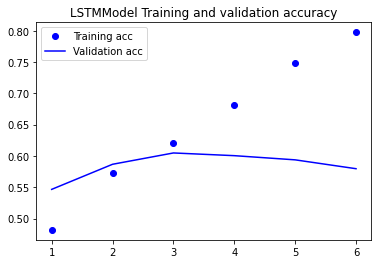

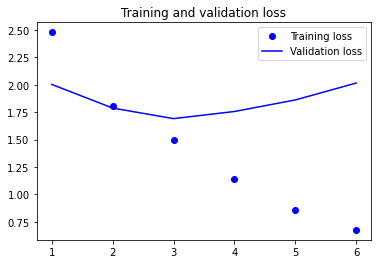

In [ ]:
#scores_LSTM = model_LSTM.evaluate(X_test, y_test, verbose=0)
print("Accuracy of LSTM for unagumented data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of LSTM for unagumented data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of LSTM for unaugmented data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of LSTM for unaugmented data is :",np.array(history.history['loss'])
      .mean())
#plot for LSTM
modelname="LSTMModel"
plot(model_LSTM,history)

In [ ]:
model_GRU=GRU_model(max_features,emb_dim,inp_len) 
history=model_GRU.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 189, 300)          3000000   
_________________________________________________________________
gru (GRU)                    (None, 189, 512)          1250304   
_________________________________________________________________
dropout_1 (Dropout)          (None, 189, 512)          0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 189, 512)          262656    
_________________________________________________________________
flatten_1 (Flatten)          (None, 96768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 74)                7160906   
Total params: 11,673,866
Trainable params: 11,673,866
Non-trainable params: 0
__________________________________________

Accuracy of GRU for unagumented data is: 58.02554041147232
Training Accuracy of GRU for unagumented data is: 71.93185649812222
Mean loss of  Validation data of GRU for unaugmented data is : 2.1925691962242126
Mean loss of  Training data of GRU for unaugmented data is : 1.1091965660452843


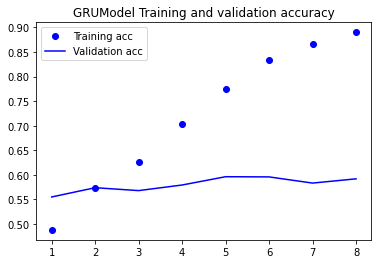

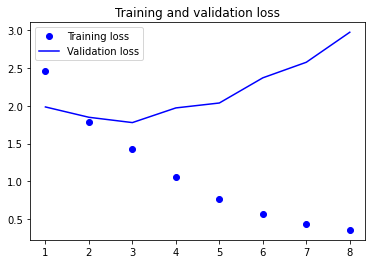

In [ ]:
print("Accuracy of GRU for unagumented data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of GRU for unagumented data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of GRU for unaugmented data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of GRU for unaugmented data is :",np.array(history.history['loss'])
      .mean())
#plot for GRU
modelname="GRUModel"
plot(model_GRU,history)

In [ ]:
model_BILSTM=BILSTM_model(max_features,emb_dim,inp_len) 
history=model_BILSTM.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),callbacks=[early_stopping])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 189, 300)          3000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 189, 1024)         3330048   
_________________________________________________________________
dropout_2 (Dropout)          (None, 189, 1024)         0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 189, 512)          524800    
_________________________________________________________________
flatten_2 (Flatten)          (None, 96768)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 74)                7160906   
Total params: 14,015,754
Trainable params: 14,015,754
Non-trainable params: 0
__________________________________________

Accuracy of BILSTM for unagumented data is: 58.42392444610596
Training Accuracy of BILSTM for unagumented data is: 71.41359713342455
Mean loss of  Validation data of BILSTM for unaugmented data is : 2.1243492629792957
Mean loss of  Training data of BILSTM for unaugmented data is : 1.133795400460561


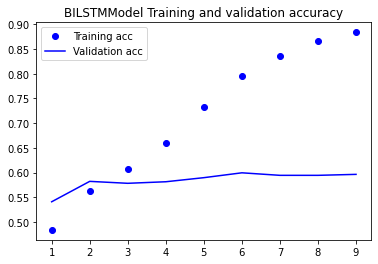

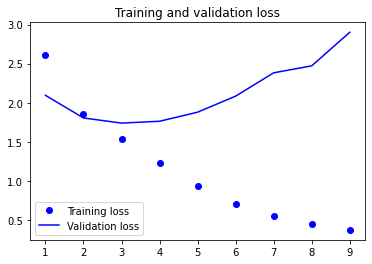

In [ ]:
print("Accuracy of BILSTM for unagumented data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of BILSTM for unagumented data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of BILSTM for unaugmented data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of BILSTM for unaugmented data is :",np.array(history.history['loss'])
      .mean())

#plot for BILSTM
modelname="BILSTMModel"
plot(model_BILSTM,history)

In [ ]:
model_BIGRU=BIGRU_model(max_features,emb_dim,inp_len) 
history=model_BIGRU.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),callbacks=[early_stopping])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 189, 300)          3000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 189, 1024)         2500608   
_________________________________________________________________
dropout_3 (Dropout)          (None, 189, 1024)         0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 189, 512)          524800    
_________________________________________________________________
flatten_3 (Flatten)          (None, 96768)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 74)                7160906   
Total params: 13,186,314
Trainable params: 13,186,314
Non-trainable params: 0
__________________________________________

Accuracy of BIGRU for unagumented data is: 58.51560831069946
Training Accuracy of BIGRU for unagumented data is: 74.50958457258012
Mean loss of  Validation data of BIGRU for unaugmented data is : 2.422294855117798
Mean loss of  Training data of BIGRU for unaugmented data is : 0.9942934215068817


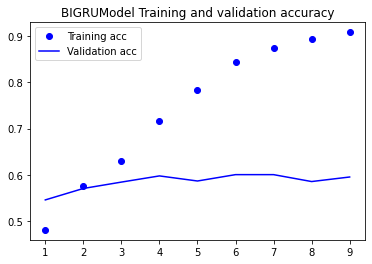

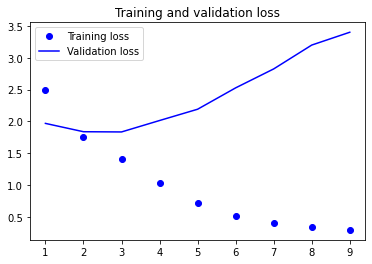

In [ ]:
print("Accuracy of BIGRU for unagumented data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of BIGRU for unagumented data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of BIGRU for unaugmented data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of BIGRU for unaugmented data is :",np.array(history.history['loss'])
      .mean())
#plot for BIGRU
modelname="BIGRUModel"
plot(model_BIGRU,history)

In [12]:
X_aug1 = (data_dl_aug1["Combined Description Cleaned"])
y_aug1= (data_dl_aug1['Assignment group'])

#categorical encoding y
y_aug1=pd.get_dummies(data_dl_aug2['Assignment group'])


X_aug2 = (data_dl_aug2["Combined Description Cleaned"])
y_aug2= (data_dl_aug2['Assignment group'])

#categorical encoding y
y_aug2=pd.get_dummies(data_dl_aug2['Assignment group'])
  

In [13]:
#tokenization
X_aug1,tokenizer = dfTokenizer(data_dl_aug1["Combined Description Cleaned"]) 
vocab_size_aug1=len(tokenizer.word_index)
print("vocabulary size is: ",vocab_size_aug1)

X_aug2,tokenizer = dfTokenizer(data_dl_aug2["Combined Description Cleaned"]) 
vocab_size_aug2=len(tokenizer.word_index)
print("vocabulary size is: ",vocab_size_aug2)

vocabulary size is:  3956
vocabulary size is:  4424


In [14]:
#padding
X_aug1=pad_sequences(X_aug1,padding='post')
X_aug2=pad_sequences(X_aug2,padding='post')
y_aug1=y_aug1[0:17586]

In [15]:
#split the data.Only augmented data is split using stratify
def split_stratify(X,y):
 X_train_spl,X_test_spl,y_train_spl,y_test_spl=train_test_split(X,y,test_size=0.3,stratify=y,random_state=123)
 return X_train_spl,X_test_spl,y_train_spl,y_test_spl

X_train_aug1,X_test_aug1,y_train_aug1,y_test_aug1=split_stratify(X_aug1,y_aug1)
X_train_aug2,X_test_aug2,y_train_aug2,y_test_aug2=split_stratify(X_aug2,y_aug2)


inp_len1=X_aug1.shape[1]
inp_len2=X_aug2.shape[1]
print(inp_len1)
print(inp_len2)

191
191


In [16]:
#Simple LSTM model1
def LSTM_model1(output_len,emb_dim,input_length):
 model = tf.keras.Sequential()
 model.add(Embedding(max_features,emb_dim,input_length=inp_len1))
 model.add(LSTM(512, return_sequences=True))
 model.add(Dropout(0.2))
 model.add(TimeDistributed(Dense(units = 512, activation = 'relu')))
 model.add(Flatten())
 model.add(Dense(74, activation='softmax'))
 print(model.summary())
 model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 return model



#Using GRU
def GRU_model1(output_len,emb_dim,input_length):
 model = tf.keras.Sequential()
 model.add(Embedding(max_features,emb_dim,input_length=inp_len1))
 model.add(GRU(512, return_sequences=True))
 model.add(Dropout(0.2))
 model.add(TimeDistributed(Dense(units = 512, activation = 'relu')))
 model.add(Flatten())
 model.add(Dense(74, activation='softmax'))
 print(model.summary())
 model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 return model


 #Using bidirectional LSTM
from tensorflow.keras.layers import Bidirectional
def BILSTM_model1(output_len,emb_dim,input_length):
 model = tf.keras.Sequential()
 model.add(Embedding(max_features,emb_dim,input_length=inp_len1))
 model.add(Bidirectional(LSTM(512, return_sequences=True)))
 model.add(Dropout(0.2))
 model.add(TimeDistributed(Dense(units = 512, activation = 'relu')))
 model.add(Flatten())
 model.add(Dense(74, activation='softmax'))
 print(model.summary())
 model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 return model


#Using bidirectional GRU
def BIGRU_model1(output_len,emb_dim,input_length):
 model = tf.keras.Sequential()
 model.add(Embedding(max_features,emb_dim,input_length=inp_len1))
 model.add(Bidirectional(GRU(512, return_sequences=True)))
 model.add(Dropout(0.2))
 model.add(TimeDistributed(Dense(units = 512, activation = 'relu')))
 model.add(Flatten())
 model.add(Dense(74, activation='softmax'))
 print(model.summary())
 model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
 return model


In [ ]:
model_LSTM_aug1=LSTM_model1(max_features,emb_dim,inp_len1) 
history=model_LSTM_aug1.fit(X_train_aug1,y_train_aug1,batch_size=batch_size,epochs=epochs,validation_data=(X_test_aug1,y_test_aug1),callbacks=[early_stopping])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 191, 300)          3000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 191, 512)          1665024   
_________________________________________________________________
dropout_4 (Dropout)          (None, 191, 512)          0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 191, 512)          262656    
_________________________________________________________________
flatten_4 (Flatten)          (None, 97792)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 74)                7236682   
Total params: 12,164,362
Trainable params: 12,164,362
Non-trainable params: 0
__________________________________________

Accuracy of LSTM for level1 augmentation data is: 76.33488582713264
Training Accuracy of LSTM for level1 augmentation  data is: 83.61668820892062
Mean loss of  Validation data of LSTM for level1 augmentation  data is : 0.9653580401624952
Mean loss of  Training data of LSTM forlevel1 augmentation  data is : 0.5819752386638096


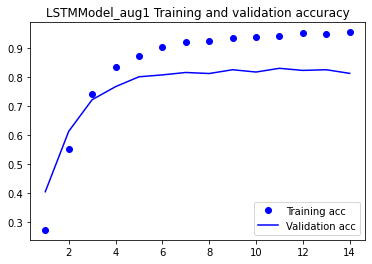

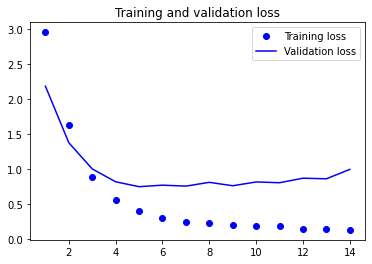

In [ ]:
print("Accuracy of LSTM for level1 augmentation data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of LSTM for level1 augmentation  data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of LSTM for level1 augmentation  data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of LSTM forlevel1 augmentation  data is :",np.array(history.history['loss'])
      .mean())
modelname="LSTMModel_aug1"
plot(model_LSTM_aug1,history)

In [ ]:
model_GRU_aug1=GRU_model1(max_features,emb_dim,inp_len1) 
history=model_GRU_aug1.fit(X_train_aug1,y_train_aug1,batch_size=batch_size,epochs=epochs,validation_data=(X_test_aug1,y_test_aug1),callbacks=[early_stopping])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 191, 300)          3000000   
_________________________________________________________________
gru_2 (GRU)                  (None, 191, 512)          1250304   
_________________________________________________________________
dropout_5 (Dropout)          (None, 191, 512)          0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 191, 512)          262656    
_________________________________________________________________
flatten_5 (Flatten)          (None, 97792)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 74)                7236682   
Total params: 11,749,642
Trainable params: 11,749,642
Non-trainable params: 0
__________________________________________

Accuracy of GRU for level1 augmentation data is: 80.81381477807697
Training Accuracy of GRU for level1 augmentation  data is: 88.89862800899306
Mean loss of  Validation data of GRU for level1 augmentation  data is : 0.8278747075482419
Mean loss of  Training data of GRU for level1 augmentation  data is : 0.392469517102367


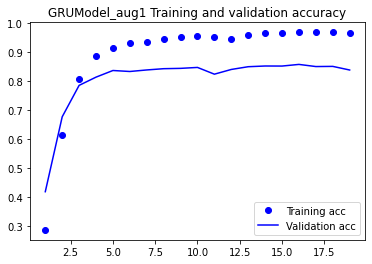

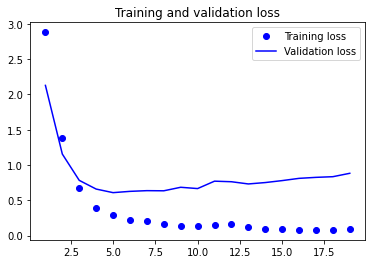

In [ ]:
print("Accuracy of GRU for level1 augmentation data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of GRU for level1 augmentation  data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of GRU for level1 augmentation  data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of GRU for level1 augmentation  data is :",np.array(history.history['loss'])
      .mean())

modelname="GRUModel_aug1"
plot(model_GRU_aug1,history)

In [ ]:
#x

In [ ]:
model_BILSTM_aug1=BILSTM_model1(max_features,emb_dim,inp_len1) 
history=model_BILSTM_aug1.fit(X_train_aug1,y_train_aug1,batch_size=batch_size,epochs=epochs,validation_data=(X_test_aug1,y_test_aug1),callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 191, 300)          3000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 191, 1024)         3330048   
_________________________________________________________________
dropout (Dropout)            (None, 191, 1024)         0         
_________________________________________________________________
time_distributed (TimeDistri (None, 191, 512)          524800    
_________________________________________________________________
flatten (Flatten)            (None, 97792)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 74)                7236682   
Total params: 14,091,530
Trainable params: 14,091,530
Non-trainable params: 0
____________________________________________

Accuracy of BILSTM for level1 augmentation data is: 76.41205415129662
Training Accuracy of BILSTM for level1 augmentation  data is: 82.37002342939377
Mean loss of  Validation data of BILSTM for level1 augmentation  data is : 0.9318345834811529
Mean loss of  Training data of BILSTM forlevel1 augmentation  data is : 0.6326616617540518


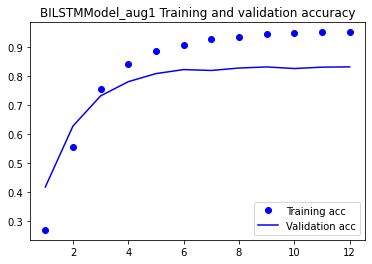

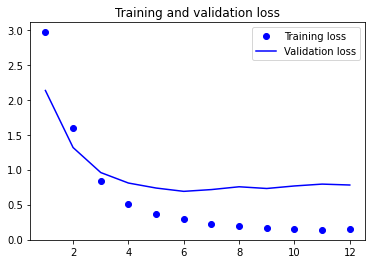

In [ ]:
print("Accuracy of BILSTM for level1 augmentation data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of BILSTM for level1 augmentation  data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of BILSTM for level1 augmentation  data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of BILSTM forlevel1 augmentation  data is :",np.array(history.history['loss'])
      .mean())
#plot for BILSTM
modelname="BILSTMModel_aug1"
plot(model_BILSTM_aug1,history)

In [ ]:
model_BIGRU_aug1=BIGRU_model1(max_features,emb_dim,inp_len1) 
history=model_BIGRU_aug1.fit(X_train_aug1,y_train_aug1,batch_size=batch_size,epochs=epochs,validation_data=(X_test_aug1,y_test_aug1),callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 191, 300)          3000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 191, 1024)         2500608   
_________________________________________________________________
dropout_1 (Dropout)          (None, 191, 1024)         0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 191, 512)          524800    
_________________________________________________________________
flatten_1 (Flatten)          (None, 97792)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 74)                7236682   
Total params: 13,262,090
Trainable params: 13,262,090
Non-trainable params: 0
__________________________________________

Accuracy of BIGRU for level 1 augmentation data is: 79.12433624267578
Training Accuracy of BIGRU for level1 augmentation  data is: 82.94882267713547
Mean loss of  Validation data of BIGRU for level1 augmentation  data is : 0.824859356880188
Mean loss of  Training data of BIGRU forlevel1 augmentation  data is : 0.6180907532572746


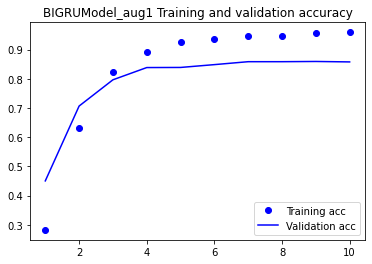

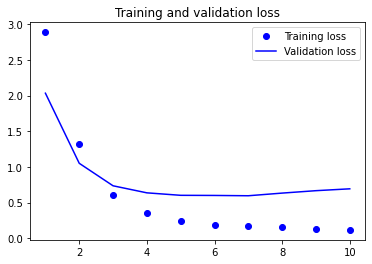

In [ ]:
print("Accuracy of BIGRU for level 1 augmentation data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of BIGRU for level1 augmentation  data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of BIGRU for level1 augmentation  data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of BIGRU forlevel1 augmentation  data is :",np.array(history.history['loss'])
      .mean())
#plot for BIGRU
modelname="BIGRUModel_aug1"
plot(model_BIGRU_aug1,history)

In [18]:
model_LSTM_aug2=LSTM_model1(max_features,emb_dim,inp_len1) 
history=model_LSTM_aug2.fit(X_train_aug2,y_train_aug2,batch_size=batch_size,epochs=epochs,validation_data=(X_test_aug2,y_test_aug2),callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 191, 300)          3000000   
_________________________________________________________________
lstm (LSTM)                  (None, 191, 512)          1665024   
_________________________________________________________________
dropout (Dropout)            (None, 191, 512)          0         
_________________________________________________________________
time_distributed (TimeDistri (None, 191, 512)          262656    
_________________________________________________________________
flatten (Flatten)            (None, 97792)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 74)                7236682   
Total params: 12,164,362
Trainable params: 12,164,362
Non-trainable params: 0
____________________________________________

Accuracy of LSTM for level2 augmentation data is: 86.32204234600067
Training Accuracy of LSTM for level2 augmentation  data is: 88.46500835248402
Mean loss of  Validation data of LSTM for level2 augmentation  data is : 0.4930925518274307
Mean loss of  Training data of LSTM forlevel2 augmentation  data is : 0.39311610268695013


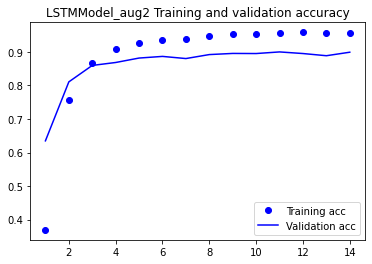

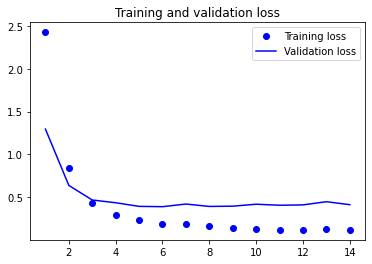

In [19]:
print("Accuracy of LSTM for level2 augmentation data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of LSTM for level2 augmentation  data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of LSTM for level2 augmentation  data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of LSTM forlevel2 augmentation  data is :",np.array(history.history['loss'])
      .mean())
#plot for LSTM
modelname="LSTMModel_aug2"
plot(model_LSTM_aug2,history)

In [20]:
model_GRU_aug2=GRU_model1(max_features,emb_dim,inp_len1) 
history=model_GRU_aug2.fit(X_train_aug2,y_train_aug2,batch_size=batch_size,epochs=epochs,validation_data=(X_test_aug2,y_test_aug2),callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 191, 300)          3000000   
_________________________________________________________________
gru (GRU)                    (None, 191, 512)          1250304   
_________________________________________________________________
dropout_1 (Dropout)          (None, 191, 512)          0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 191, 512)          262656    
_________________________________________________________________
flatten_1 (Flatten)          (None, 97792)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 74)                7236682   
Total params: 11,749,642
Trainable params: 11,749,642
Non-trainable params: 0
__________________________________________

In [ ]:
print("Accuracy of GRU for level2 augmentation data is:",np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of GRU for level2 augmentation  data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of GRU for level2 augmentation  data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of GRU for level2 augmentation  data is :",np.array(history.history['loss'])
      .mean())
#plot for GRU
modelname="GRUModel_aug2"
plot(model_GRU_aug2,history)

In [17]:
#x

In [18]:
model_BILSTM_aug2=BILSTM_model1(max_features,emb_dim,inp_len1) 
history=model_BILSTM_aug2.fit(X_train_aug2,y_train_aug2,batch_size=batch_size,epochs=epochs,validation_data=(X_test_aug2,y_test_aug2),callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 191, 300)          3000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 191, 1024)         3330048   
_________________________________________________________________
dropout (Dropout)            (None, 191, 1024)         0         
_________________________________________________________________
time_distributed (TimeDistri (None, 191, 512)          524800    
_________________________________________________________________
flatten (Flatten)            (None, 97792)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 74)                7236682   
Total params: 14,091,530
Trainable params: 14,091,530
Non-trainable params: 0
____________________________________________

Accuracy of BILSTM for level2 augmentation data is: 85.74250042438507
Training Accuracy of BILSTM for level2 augmentation  data is: 86.45007908344269
Mean loss of  Validation data of BILSTM for level2 augmentation  data is : 0.5089244306087494
Mean loss of  Training data of BILSTM for level2 augmentation  data is : 0.47137312293052674


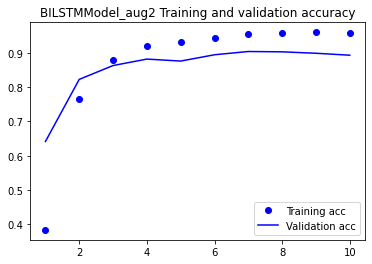

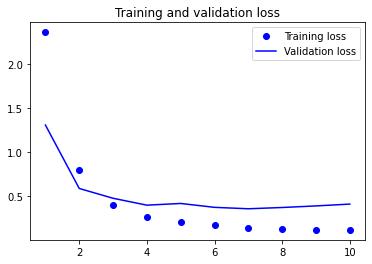

In [19]:
print("Accuracy of BILSTM for level2 augmentation data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of BILSTM for level2 augmentation  data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of BILSTM for level2 augmentation  data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of BILSTM for level2 augmentation  data is :",np.array(history.history['loss'])
      .mean())
modelname="BILSTMModel_aug2"
plot(model_BILSTM_aug2,history)

In [20]:
model_BIGRU_aug2=BIGRU_model1(max_features,emb_dim,inp_len1) 
history=model_BIGRU_aug2.fit(X_train_aug2,y_train_aug2,batch_size=batch_size,epochs=epochs,validation_data=(X_test_aug2,y_test_aug2),callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 191, 300)          3000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 191, 1024)         2500608   
_________________________________________________________________
dropout_1 (Dropout)          (None, 191, 1024)         0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 191, 512)          524800    
_________________________________________________________________
flatten_1 (Flatten)          (None, 97792)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 74)                7236682   
Total params: 13,262,090
Trainable params: 13,262,090
Non-trainable params: 0
__________________________________________

Accuracy of BIGRU for level2 augmentation data is: 88.6099175973372
Training Accuracy of BIGRU for level2 augmentation  data is: 89.27427476102655
Mean loss of  Validation data of BIGRU for level2 augmentation  data is : 0.40930344570766797
Mean loss of  Training data of BIGRU for level2 augmentation  data is : 0.3681054413318634


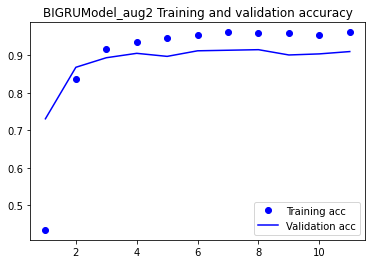

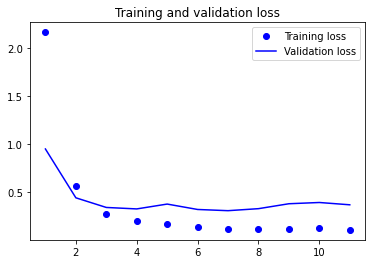

In [21]:
print("Accuracy of BIGRU for level2 augmentation data is:", np.array(history.history['val_accuracy']).mean()*100)
print("Training Accuracy of BIGRU for level2 augmentation  data is:" ,np.array(history.history['accuracy']).mean()*100)
print( "Mean loss of  Validation data of BIGRU for level2 augmentation  data is :",np.array(history.history['val_loss']).mean())
print( "Mean loss of  Training data of BIGRU for level2 augmentation  data is :",np.array(history.history['loss'])
      .mean())
#plot for BIGRUm
modelname="BIGRUModel_aug2"
plot(model_BIGRU_aug2,history)